1. In this assignment, you'll continue working with the [heart disease dataset](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UC Irvine Machine Learning Repository.
> Load the dataset from Thinkful's database. To connect to the database, use these credentials:
```
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'
```
>The dataset needs some preprocessing. So, before working with the dataset, apply the following code:
```
 # Define the features and the outcome
 X = heartdisease_df.iloc[:, :13]
 y = heartdisease_df.iloc[:, 13]

 # Replace missing values (marked by `?`) with a `0`
 X = X.replace(to_replace='?', value=0)

 # Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
 y = np.where(y > 0, 1, 0)
```
Here, `X` will represent your features and `y` will hold the labels. If `y` is equal to `1`, that indicates that the corresponding patient has heart disease. And if `y` is equal to `0`, then the patient doesn't have heart disease.

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks below. You can also take a look at these [example solutions](https://github.com/Thinkful-Ed/data-201-resources/blob/master/clustering_module_solutions/4.solution_hierarchical_clustering.ipynb).

1. Produce dendrograms for the heart disease dataset. Use three different linkage methods: `complete`, `average`, and `ward`. Which linkage method do you think produces the most reasonable result?
1. Apply agglomerative clustering to the heart disease data by setting `n_clusters=2`. Try the three linkage methods above, and get ARI and silhouette scores for each of your solutions. Compare the results with each other. Then compare the results with the results from the k-means solution that you implemented in the previous checkpoint's assignment. Which algorithm and setting perform better?


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics
from sqlalchemy import create_engine

In [4]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease', con = engine)
engine.dispose()

# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0, 1, 0)

### Produce dendrograms for the heart disease dataset. Use three different linkage methods: complete, average, and ward. Which linkage method do you think produces the most reasonable result?

In [14]:
# Standardize the features.
X_std = StandardScaler().fit_transform(X)

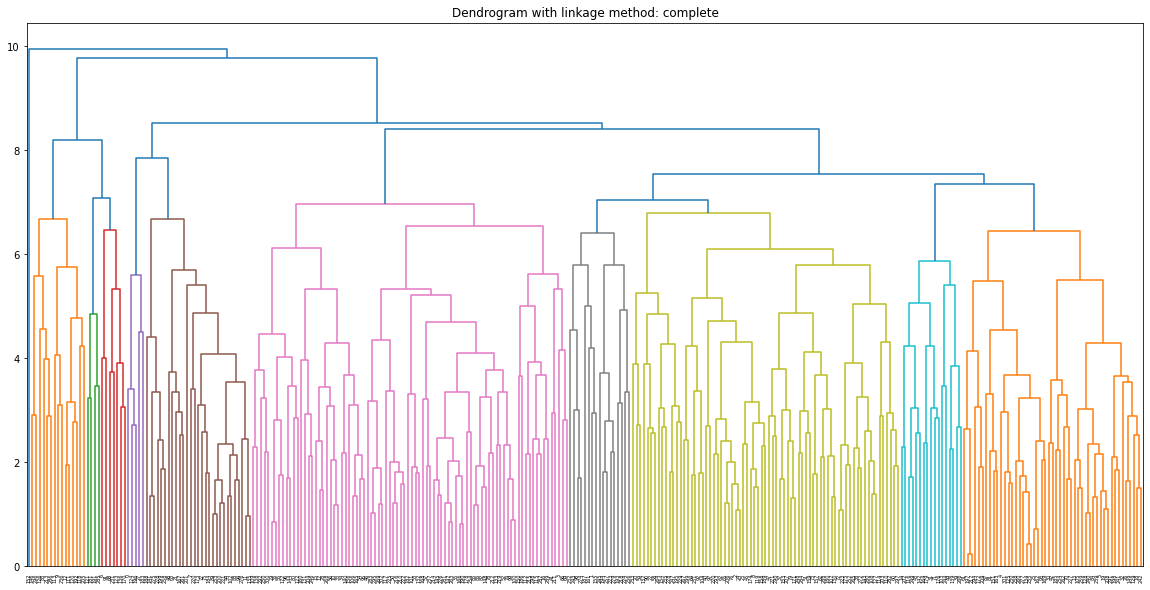

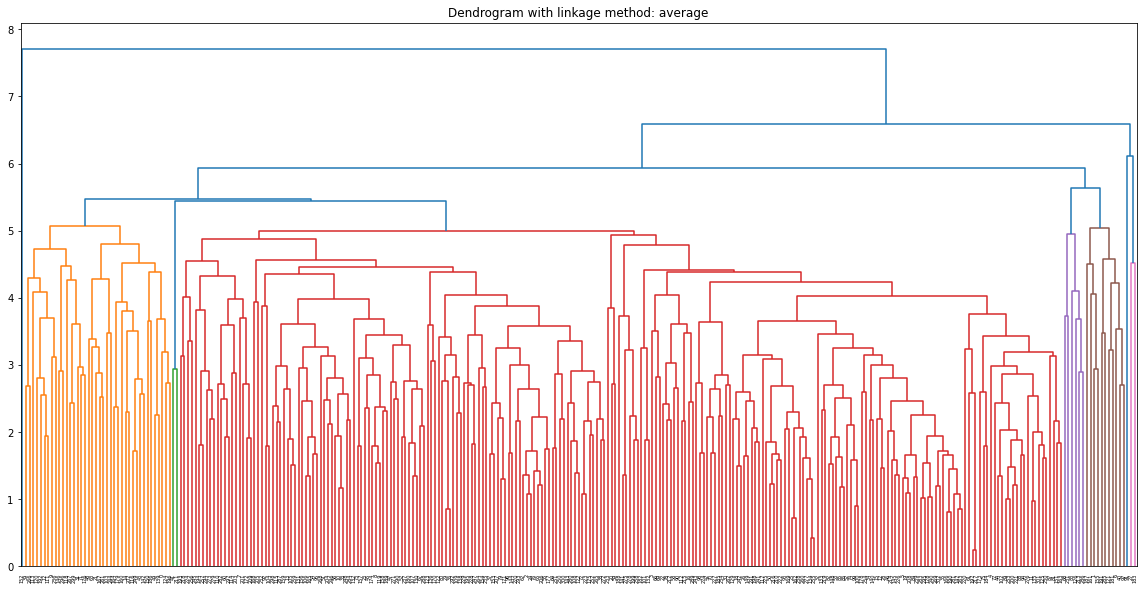

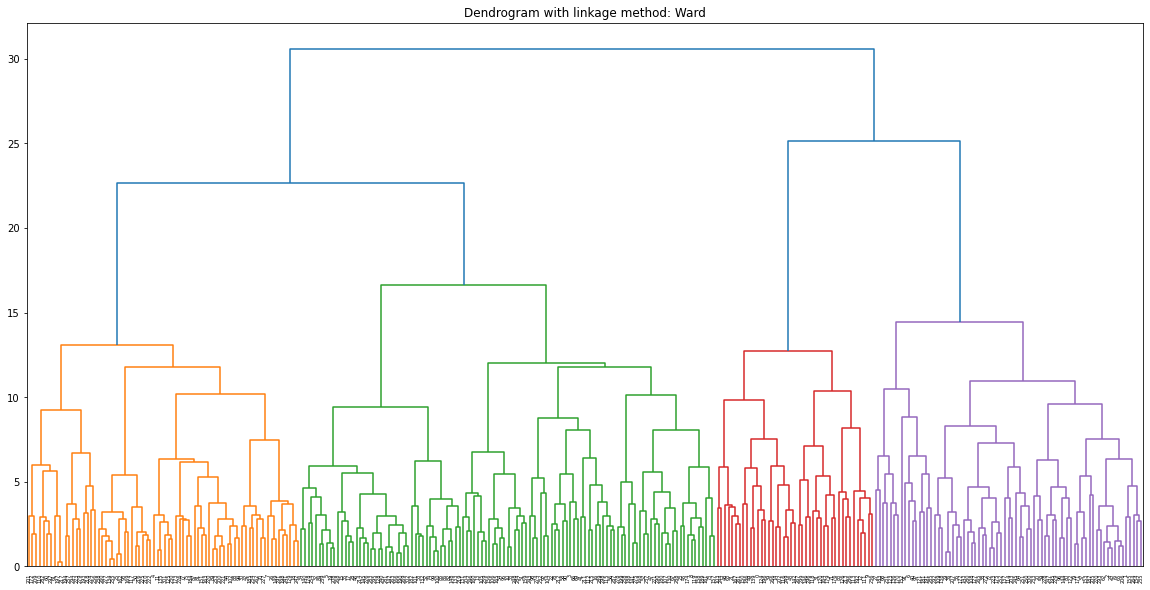

In [13]:
# Dendrogram using complete method:
plt.figure(figsize = (20, 10))
dendrogram(linkage(X_std, method = 'complete'))
plt.title("Dendrogram with linkage method: complete")
plt.show()

# Dendrogram using average method:
plt.figure(figsize = (20, 10))
dendrogram(linkage(X_std, method = 'average'))
plt.title("Dendrogram with linkage method: average")
plt.show()

# Dendrogram using ward method:
plt.figure(figsize = (20, 10))
dendrogram(linkage(X_std, method = 'ward'))
plt.title("Dendrogram with linkage method: Ward")
plt.show()

The more reasonable result is that of the `ward` method's. The `complete` and `average` methods produced results that are hard to reconcile with the facts as their two cluster solutions has too few observations for one of the clusters.

### Apply agglomerative clustering to the heart disease data by setting `n_clusters=2`. Try the three linkage methods above, and get ARI and silhouette scores for each of your solutions. Compare the results with each other. Then compare the results with the results from the k-means solution that you implemented in the previous checkpoint's assignment. Which algorithm and setting perform better?

In [15]:
# Complete method:
ac_complete = AgglomerativeClustering(linkage = 'complete', n_clusters = 2)
clusters_complete = ac_complete.fit_predict(X_std)
print("Adjusted Rand Index of the Agglomerative Clustering solution wtih complete method: {}"
     .format(metrics.adjusted_rand_score(y, clusters_complete)))
print("The silhouette score of the Agglomerative Clustring solution with complete method: {}"
     .format(metrics.silhouette_score(X_std, clusters_complete, metric='euclidean')))

# Average method:
clusters_average = ac_average.fit_predict(X_std)
ac_average = AgglomerativeClustering(linkage = 'average', n_clusters = 2)
print("Adjusted Rand Index of the Agglomerative Clustering solution wtih average method: {}"
     .format(metrics.adjusted_rand_score(y, clusters_average)))
print("The silhouette score of the Agglomerative Clustring solution with average method: {}"
     .format(metrics.silhouette_score(X_std, clusters_average, metric='euclidean')))

# Ward method:
clusters_ward = ac_ward.fit_predict(X_std)
ac_ward = AgglomerativeClustering(linkage = 'ward', n_clusters = 2)
print("Adjusted Rand Index of the Agglomerative Clustering solution wtih Ward method: {}"
     .format(metrics.adjusted_rand_score(y, clusters_ward)))
print("The silhouette score of the Agglomerative Clustring solution with Ward method: {}"
     .format(metrics.silhouette_score(X_std, clusters_ward, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution wtih complete method: -0.0010061512759301108
The silhouette score of the Agglomerative Clustring solution with complete method: 0.34836188921330785
Adjusted Rand Index of the Agglomerative Clustering solution wtih average method: -0.0010061512759301108
The silhouette score of the Agglomerative Clustring solution with average method: 0.34836188921330785
Adjusted Rand Index of the Agglomerative Clustering solution wtih Ward method: 0.146129913123814
The silhouette score of the Agglomerative Clustring solution with Ward method: 0.1387197366557222


The best setting is the ward method when used with euclidean metrics.